In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# COVID-19 Data Analysis
# Rini Christy's data found here (originally accessed 04/2022): https://www.kaggle.com/datasets/rinichristy/covid19-coronavirus-pandemic
# Analysis by Victoria Porter, written in Python 3.9

 
COVID Data Analysis
 


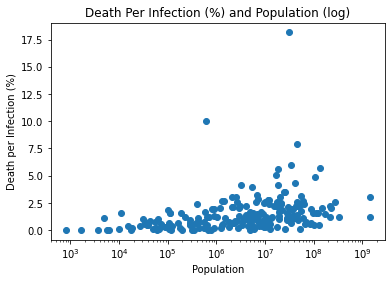

There's a positive relationship between the population of a country and rate of death from infection, x scaled logarithmically for ease of interpretation. Two clear outliers exist, China and India, both of whom have the largest populations but, a death percentage of 2.997% and 1.212%, respectively. The countries with the largest death percentages, Yemen and The Western Sahara, had low to very low report rates, with only 10 cases reported in The Western Sahara.
 
Other names                     China
ISO 3166-1 alpha-3 CODE           CHN
Population                 1439323776
Continent                        Asia
Total Cases                    154738
Total Deaths                     4638
Tot Cases//1M pop                 108
Tot Deaths/1M pop                   3
Death percentage             2.997325
Name: China, dtype: object
 
Other names                     India
ISO 3166-1 alpha-3 CODE           IND
Population                 1403754381
Continent                        Asia
Total Case

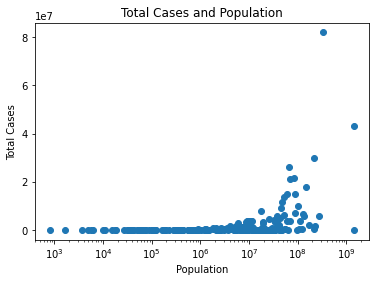

The relationship between population and total cases is also positively correlated, with the positive correlation becoming much more apparent once the population of a country exceeds one million people. The exception in this data is China, who reported a very low number of cases, around 150,000, even though they have a population of over a billion people. The country did pull together strongly at the beginning of the pandemic, creating temporary hospitals to help with overwhelm in healthcare but, the value is very likely a result of under reporting by Chinese officials. The USA has the most reported cases overall, at over 81 million people diagnosed so far.
 
Other names                     China
ISO 3166-1 alpha-3 CODE           CHN
Population                 1439323776
Continent                        Asia
Total Cases                    154738
Total Deaths                     4638
Tot Cases//1M pop                 108
Tot Deaths/1M pop                   3
Death percentage             

In [146]:
COVID_Dataset = pd.read_csv('C:/Users/Victoria/Documents/Python Practice/Datasets/COVID19_Coronavirus.csv', index_col = 0)

print(" ")
print("COVID Data Analysis")
print(" ")

# print(COVID_Dataset['Continent'].unique())

asia = COVID_Dataset[COVID_Dataset['Continent'] == 'Asia']
africa = COVID_Dataset[COVID_Dataset['Continent'] == 'Africa']
europe = COVID_Dataset[COVID_Dataset['Continent'] == 'Europe']
south_america = COVID_Dataset[COVID_Dataset['Continent'] == 'Latin America and the Caribbean']
oceania = COVID_Dataset[COVID_Dataset['Continent'] == 'Oceania']
north_america = COVID_Dataset[COVID_Dataset['Continent'] == 'Northern America']


plt.scatter(COVID_Dataset['Population'], COVID_Dataset['Death percentage'])
plt.xscale('log')
plt.xlabel('Population')
plt.ylabel('Death per Infection (%)')
plt.title('Death Per Infection (%) and Population (log)')
plt.show()  
print("There's a positive relationship between the population of a country and rate of death from infection, x scaled logarithmically for ease of interpretation. Two clear outliers exist, China and India, both of whom have the largest populations but, a death percentage of 2.997% and 1.212%, respectively. The countries with the largest death percentages, Yemen and The Western Sahara, had low to very low report rates, with only 10 cases reported in The Western Sahara.")

print(" ")
print(COVID_Dataset.loc['China'])
print(" ")
print(COVID_Dataset.loc['India'])
print(" ")
print(COVID_Dataset.loc['Western Sahara'])
print(" ")
print(COVID_Dataset.loc['Yemen'])
print(" ")

print(" ")
print("Population to Total Cases")
print(" ")

plt.scatter(COVID_Dataset['Population'], COVID_Dataset['Total Cases'])
plt.xscale('log')
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.title('Total Cases and Population')
plt.show()  
print("The relationship between population and total cases is also positively correlated, with the positive correlation becoming much more apparent once the population of a country exceeds one million people. The exception in this data is China, who reported a very low number of cases, around 150,000, even though they have a population of over a billion people. The country did pull together strongly at the beginning of the pandemic, creating temporary hospitals to help with overwhelm in healthcare but, the value is very likely a result of under reporting by Chinese officials. The USA has the most reported cases overall, at over 81 million people diagnosed so far.")
print(" ")
print(COVID_Dataset.loc['China'])
print(" ")
print(COVID_Dataset.loc['USA'])
print(" ")

print(" ")
print("Death Percentage below 1%")
print(" ")

low_dthpr = COVID_Dataset[COVID_Dataset['Death percentage'] < 1]
below1_first = low_dthpr.iloc[:, 4:6] # select columns 4 and 5
below1_second = low_dthpr.iloc[:, 8:9] # select column 8
below1 = below1_first.join(below1_second)
print(below1)

print(" ")
print("Population above 10,000 and Death Percentage above 4%")
print(" ")

pop_dr_bool = np.logical_and(COVID_Dataset['Population'] > 10000, COVID_Dataset['Death percentage'] > 4)
popten_drfour = COVID_Dataset[pop_dr_bool] # create dataset from boolean list.
pop_first = popten_drfour.iloc[:, 2:3] #select column 2
pop_second = popten_drfour.iloc[:, 4:6] # select columns 4 and 5
pop_third = popten_drfour.iloc[:, 8:9] # select column 8
pop_dr_temp = pop_first.join(pop_second) # join first and second columns
pop_dr = pop_dr_temp.join(pop_third) # join third column
print(pop_dr)



## 